In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


<h3>Data Cleaning</h3>

In [4]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1['area_type'].value_counts()


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()  

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3=df2.dropna()

In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\rohan\AppData\Local\Temp\ipykernel_2952\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3['bhk'].unique()   

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
#we can see 43 bedroom there which seems unrealistic so i want to see what kind of home it is.
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
#We cannot have 2400 sq.foot home with 47 bedrooms.So some error is there.We need to explore total_sqft column now.
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
#1133-1384 this is a range.We want a single number
#First, we can filter out rows where total_sqft does not look like a valid number.If a number can be converted into float it is valid otherwise 
#there will be exception and it will return false.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
#Anytime if we get values like 34.46Sq.Meter or 4125Perch,we will simply ignore it(though we can convert them into Sq.foot) 
#and for ranges we will convert them into single number by taking their average.
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)     #if it s already a single number,convert it into float
    except:
        return None

In [22]:
convert_sqft_to_num('2166')

2166.0

In [23]:
convert_sqft_to_num('2100-2850')

2475.0

In [24]:
convert_sqft_to_num('34.46Sq. Meter')

In [25]:
df4=df3.copy()

In [26]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)  

In [27]:
df4.head()  

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
df4.loc[30]   #we can see the range 2100-2850 gets converted into 2475.0  

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

<h3>Feature Engineering and Dimensionality Reduction</h3>

In [29]:
#Currently we have total_sqft and total price but We know that In Real-Estate Market, Price per square feet is very imp.
#So we will add this feature which will help us to do outliars detection and removal in later stage.
df5=df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']                                 
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
#Now let's explore location.It is a text data,categorical feature.so if there is too many location it can create problem.
df5.location.unique() 

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [31]:
len(df5.location.unique())

1304

In [32]:
#1304 is very big number.Usually to handle text data we convert it into dummy columns using ont-hot encoding.
#If we keep all the locations we will have around 1300 columns in our dataframe which is too much.This is high dimensionality problem/dimensionality curse.
#There are techniques available to reduce the dimensions.One of the effective technique is to come up with the "other category"
#means when we have 1304 locations there will be many locations which will have 1 or 2 data points.
df5.location=df5.location.apply(lambda x: x.strip())  #removes any leading and trailing spaces if any.
location_stats=df5['location'].value_counts()
#location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats


location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [33]:
len(location_stats[location_stats<=10])

1052

In [34]:
locations_less_than_10=location_stats[location_stats<=10]
locations_less_than_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [35]:
#So I can put all these locations into general category called "other"

In [36]:
len(df5.location.unique())
# When you applied the strip() function to remove leading and trailing spaces from the location column ,it might have combined some locations 
#that were previously treated as separate due to spaces. For example, if " Whitefield " (with leading/trailing spaces) and "Whitefield" existed as separate entries before, 
#after stripping, they would both become "Whitefield", reducing the unique count.

1293

In [37]:
df5.location=df5.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df5.location.unique())

242

In [38]:
#This is good bcoz when later on i will convert this into one-hot encoding, i will only have 242 columns.

In [39]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


<h3>Outliar Detection And Removal</h3>

In [40]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [41]:
#So we can safely remove all this datapoints bcoz these are anomolies/outliars.
df5.shape

(13246, 7)

In [42]:
df6= df5[~(df5.total_sqft/df5.bhk<300)]   #removed some outliars
df6.shape

(12502, 7)

In [43]:
#we can have more outliars.Let's check price_per_sqft
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
#The minimum price per square foot is 267.83, which seems unusually low. This could represent an outlier.
#The maximum price per square foot is 176470.59, which seems extremely high. This is a likely outlier.



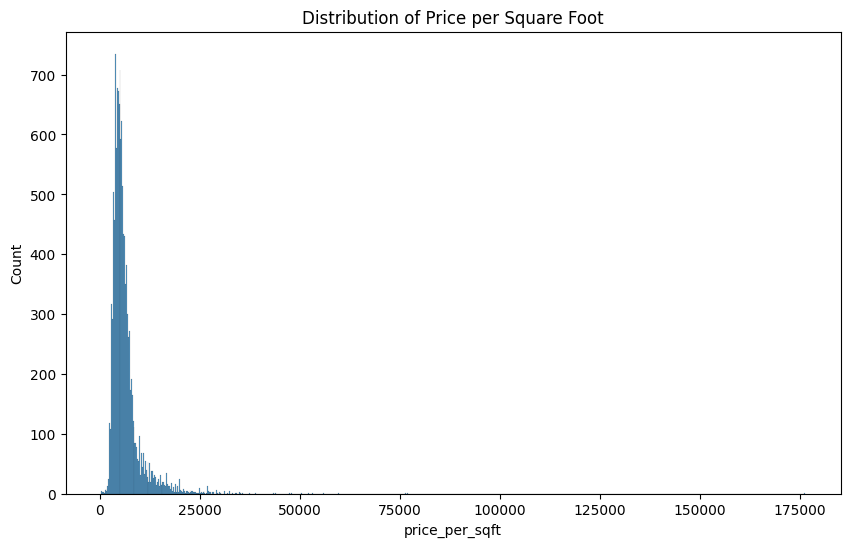

In [45]:
import seaborn as sns

# Plot the distribution of price_per_sqft
plt.figure(figsize=(10, 6))                       #we have already imported matplotlib at the beginning
sns.histplot(df6['price_per_sqft'])
plt.title('Distribution of Price per Square Foot')
plt.show()

In [46]:
#So this is right skewed data.Our distribution is not normal.So we use IQR method
#Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df6['price_per_sqft'].quantile(0.25)
Q3 = df6['price_per_sqft'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df7 = df6[(df6['price_per_sqft'] >= lower_bound) & (df6['price_per_sqft'] <= upper_bound)]

# Check the new shape of the dataset after removing outliers
df7.shape


(11453, 7)

In [47]:
df7.price_per_sqft.describe()

count    11453.000000
mean      5413.464008
std       1758.555400
min        267.829813
25%       4123.711340
50%       5100.483092
75%       6412.478336
max      10967.098704
Name: price_per_sqft, dtype: float64

In [48]:
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: 151.3157894736828
Upper Bound: 10975.877192982458


In [49]:
mean = df7['price_per_sqft'].mean()
std_dev = df7['price_per_sqft'].std()

lower_bound = mean - 2 * std_dev  # 2 standard deviations below the mean
upper_bound = mean + 2 * std_dev  # 2 standard deviations above the mean

# Filter the dataset to remove outlier
df8 = df7[(df7['price_per_sqft'] >= lower_bound) & (df7['price_per_sqft'] <= upper_bound)]

In [50]:
df8.shape

(10866, 7)

In [51]:
df8.price_per_sqft.describe()

count    10866.000000
mean      5193.168999
std       1454.342389
min       1900.000000
25%       4083.333333
50%       5000.000000
75%       6187.161640
max       8929.159802
Name: price_per_sqft, dtype: float64

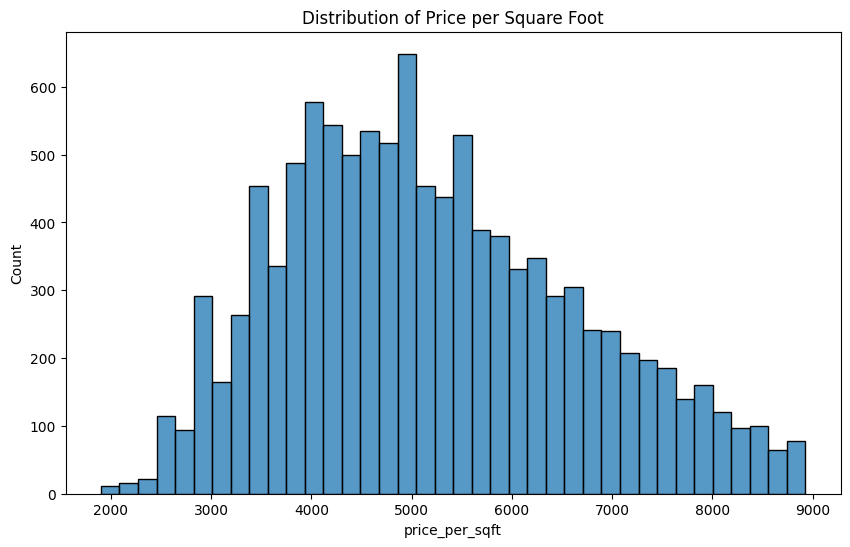

In [52]:
#Now we have to check that Property prices for 3 bedroom apartments are more than property price of 2 bedroom apartment or not.
#for the same sqft area. In some cases price of 2 bhk can be more we don't know what the exact reason.Now we will do visualization to know how
#many such cases are there.


plt.figure(figsize=(10, 6))                      
sns.histplot(df8['price_per_sqft'])
plt.title('Distribution of Price per Square Foot')
plt.show()



In [53]:
#Initially, the dataset was right-skewed because of the extreme price-per-square-foot values, 
#but after removing the outliers (using 2 standard deviations as a threshold), the distribution has become more symmetrical, 
#resembling a normal distribution.

In [54]:
#Now let's explore Bath.
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [55]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

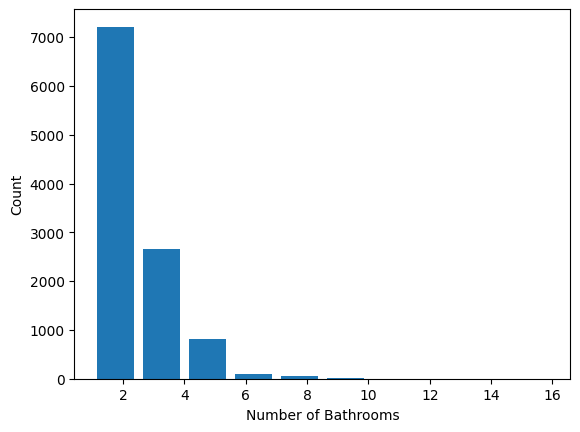

In [56]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [57]:
#usually if number of bedrooms are suppose 2,then there can be 2 or at max consider 3 bathrooms but can't be 4.
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [58]:
#so these are outliars.
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(10787, 7)

In [59]:
#Now my dataframe looks pretty much neat and clean.We can prepare it for training but for that 
#I have to drop some unnecessary features.For size we already have bhk feature and price_per_sqft we have used just for outliar detection.
#so we can drop these features.
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


<h3>One-Hot Encoding</h3>

In [60]:
#We have location here and we know that ML model cannot interpret textual data.So we have to convert this into 
#numerical column and one of the way to do this is to Use One-Hot Encoding.It is also called Dummies.
location_dummies = pd.get_dummies(df10.location, dtype=int)
location_dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Assuming 'location_dummies' is your one-hot encoded DataFrame,checking if the encoding has been done correctly.
row_sums = location_dummies.sum(axis=1)
print(row_sums)


0        1
1        1
2        1
3        1
4        1
        ..
13313    1
13314    1
13315    1
13317    1
13319    1
Length: 10787, dtype: int64


In [62]:
#We can see it is done correctly.
#Now we have to append this in our main dataframe.We will concat 2 dataframes.
df11= pd.concat([df10,location_dummies.drop('other',axis='columns')],axis='columns')

In [63]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#Now I can drop 'location' column as we have already covered it in those dummies columns.
df12 = df11.drop('location',axis='columns')
df12.head() 

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df12.shape

(10787, 244)

<h3>Feature Scaling</h3>

In [66]:
#It’s essential to scale your numerical features (total_sqft, bhk, bath) before fitting the Linear Regression model. 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df12[['total_sqft', 'bhk', 'bath']] = scaler.fit_transform(df12[['total_sqft', 'bhk', 'bath']])


In [67]:
import pickle

In [68]:
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)  # Save the fitted scaler


<h3>Train-Test Split</h3>

In [69]:
from sklearn.model_selection import train_test_split

X = df12.drop('price', axis=1)  # Features
y = df12['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,-0.487060,-0.448025,-0.602272,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.426018,2.895732,1.682886,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.011269,-0.448025,0.540307,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.089093,0.666561,0.540307,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.308639,-0.448025,-0.602272,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,-0.128978,-0.448025,0.540307,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0.329467,0.666561,0.540307,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,2.482920,1.781147,2.825465,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13317,-0.381742,-0.448025,-0.602272,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13313     57.00
13314    112.00
13315    231.00
13317     60.00
13319     17.00
Name: price, Length: 10787, dtype: float64

<h3>Model Building</h3>

In [72]:
from sklearn.linear_model import LinearRegression


In [73]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [74]:
# Make predictions
y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Linear Regression - MAE:", mae_linear)
print("Linear Regression - MSE:", mse_linear)
print("Linear Regression - R² Score:", r2_linear)


Linear Regression - MAE: 14.782804877360231
Linear Regression - MSE: 503.0623800145792
Linear Regression - R² Score: 0.8905648918550931


In [76]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(pred.head(10))  # Print the first 10 comparisons


       Actual  Predicted
10753    51.0  61.536080
12968    90.0  79.831814
4447     35.0  46.173687
5497     93.0  95.302051
9953     50.0  50.210734
9661     78.0  76.583558
617      70.0  81.429060
6587     40.7  38.527126
7390     65.0  56.811592
12009    31.0  47.948794


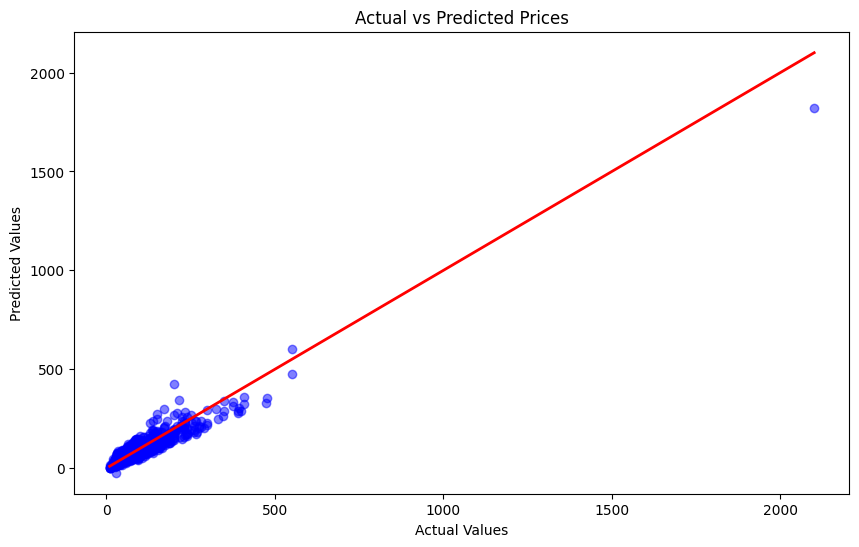

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')  # Plot actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Plot diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Prices')
plt.show()


In [78]:
pred['Error'] = abs(pred['Actual'] - pred['Predicted'])
print(pred.head(10))


       Actual  Predicted      Error
10753    51.0  61.536080  10.536080
12968    90.0  79.831814  10.168186
4447     35.0  46.173687  11.173687
5497     93.0  95.302051   2.302051
9953     50.0  50.210734   0.210734
9661     78.0  76.583558   1.416442
617      70.0  81.429060  11.429060
6587     40.7  38.527126   2.172874
7390     65.0  56.811592   8.188408
12009    31.0  47.948794  16.948794


<h3>Ridge Regression</h3>

In [79]:
from sklearn.linear_model import Ridge

# Check if X and y are defined (this assumes df12 is already preprocessed)
X = df12.drop('price', axis=1)   # Feature set
y = df12['price']                # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)      # Regularization strength
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

# Calculate errors and R² score
mae_ridge = mean_absolute_error(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Ridge Regression - MAE:", mae_ridge)
print("Ridge Regression - MSE:", mse_ridge)
print("Ridge Regression - R² Score:", r2_ridge)


Ridge Regression - MAE: 14.720669622700779
Ridge Regression - MSE: 498.95785353865915
Ridge Regression - R² Score: 0.8914577817165114


In [80]:
 pred_df = pd.DataFrame({
     'Actual': y_test,
     'Predicted': y_pred,
})

# Calculate the error
pred_df['Error'] = abs(pred_df['Actual'] - pred_df['Predicted'])

# Display the first few rows of the comparison
print(pred_df.head(10))

       Actual  Predicted      Error
10753    51.0  61.892920  10.892920
12968    90.0  79.695121  10.304879
4447     35.0  46.437433  11.437433
5497     93.0  91.568869   1.431131
9953     50.0  50.770401   0.770401
9661     78.0  76.276937   1.723063
617      70.0  81.435374  11.435374
6587     40.7  38.715483   1.984517
7390     65.0  57.097439   7.902561
12009    31.0  47.962515  16.962515


<h3>Use K Fold cross validation to measure accuracy of our RidgeRegression model</h3>

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cross_val_score(Ridge(), X, y, cv=kf)

array([0.89145778, 0.81671894, 0.81479931, 0.84979792, 0.83092261])

<h3>Lasso Regression</h3>

In [82]:
# #We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score.
# from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso

# # Initialize the model
lasso_model = Lasso(alpha=2.0)  # You can adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the performance
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - MAE:", mae_lasso)
print("Lasso Regression - MSE:", mse_lasso)
print("Lasso Regression - R² Score:", r2_lasso)






Lasso Regression - MAE: 16.938783429765593
Lasso Regression - MSE: 613.5873160930506
Lasso Regression - R² Score: 0.8665215349813274


<h3>Decision Tree Regressor</h3>

In [83]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the performance
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor - MAE:", mae_tree)
print("Decision Tree Regressor - MSE:", mse_tree)
print("Decision Tree Regressor - R² Score:", r2_tree)


Decision Tree Regressor - MAE: 15.061176164519386
Decision Tree Regressor - MSE: 675.5729866948217
Decision Tree Regressor - R² Score: 0.8530373055194806


In [84]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Ridge Regression','Lasso Regression','Decision Tree'],
    'MAE': [mae_linear, mae_ridge, mae_lasso, mae_tree],
    'MSE': [mse_linear, mse_ridge, mse_lasso, mse_tree],
    'R² Score': [r2_linear, r2_ridge, r2_lasso, r2_tree]
})

print(results)


               Model        MAE         MSE  R² Score
0  Linear Regression  14.782805  503.062380  0.890565
1   Ridge Regression  14.720670  498.957854  0.891458
2   Lasso Regression  16.938783  613.587316  0.866522
3      Decision Tree  15.061176  675.572987  0.853037


In [88]:
def predict_price(location, total_sqft, bhk, bath, number_of_floors):
    # Adjust total_sqft based on the number of floors
    adjusted_total_sqft = total_sqft * number_of_floors

    # Prepare the input data in the same format as the training data
    input_data = pd.DataFrame([[location, adjusted_total_sqft, bhk, bath]], columns=['location', 'total_sqft', 'bhk', 'bath'])
    
    # One-hot encode the location
    location_dummies = pd.get_dummies(input_data['location'], dtype=int)
    
    # Add the dummies to the input data
    input_data = input_data.join(location_dummies)
    
    # Drop the 'location' column and ensure all other columns are present (same as df12)
    input_data = input_data.drop('location', axis='columns', errors='ignore')
    
    # Scale the features using the same scaler
    input_data[['total_sqft', 'bhk', 'bath']] = scaler.transform(input_data[['total_sqft', 'bhk', 'bath']])
    
    #  Reorder columns to match the training set
    input_data = input_data.reindex(columns=X.columns, fill_value=0)  # Fill missing columns with 0
    
    # Make the prediction
    predicted_price = ridge_model.predict(input_data)  # You can change this to the model you want to use
    return predicted_price[0]


In [92]:
 predict_price('1st Phase JP Nagar',1000,2,2,2)


148.0322085238131

In [93]:
predict_price('WhiteField',3453, 5, 4,2)

406.6284755623494

In [95]:
predict_price('Indira Nagar',1200, 2, 2,2)

168.8163476904735

In [99]:
#print(df11.columns)

In [98]:
predict_price('Sarajpur',1000,3,2,2)

105.84618868236149

In [99]:
#The idea here is to save your trained model (ridge_model) into a file so that it can be loaded later for predictions without having to 
#retrain the model.

In [100]:
import pickle

# Save your trained model to a file
with open('real_estate_model.pickle', 'wb') as f:
    pickle.dump(ridge_model, f)


In [101]:
#We need to export the column names (i.e., features) used in the model, 
#which will be required later when you are making predictions through the Django app.


In [102]:
import json

# Save the column information (feature names) to a JSON file
columns = {
    'data_columns': list(X.columns)  # Keep the original casing
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))
